# Sharks Attack

## Setting Up

Importing libreries that will be used in the project:

In [ ]:
!pip install ydata-profiling
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [ ]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import time
import datetime
from fuzzywuzzy import process
import re
import seaborn as sns
import matplotlib.pyplot as plt

Loading the DataFrame

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Raw Data named as "sharks_raw" as future reference purposes
sharks_raw = pd.read_excel("https://github.com/Tatiana-ZC/2.Quest_Shark_Attack/raw/main/GSAF5.xlxs")

In [ ]:
sharks = sharks_raw.copy()

## Exploring Dataset

### Performed an initial analysis of the dataset to understand its structure and what the fields represent.

In [ ]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

Identifing the dimensions of the dataset by determining the number of rows and columns it contains.

In [ ]:
# Shape of the DataFrame (rows, columns)
sharks.shape
# Sharks database has 6969 entries and 23 columns

(6969, 23)

In [ ]:
# Column names
column_names = sharks.columns
column_names

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [ ]:
sharks.head()

Date    Year        Type    Country              State  \
0  15 Mar 2024  2024.0  Unprovoked  AUSTRALIA         Queensland   
1  04 Mar 2024  2024.0  Unprovoked        USA             Hawaii   
2  02 Mar-2024  2024.0  Unprovoked        USA             Hawaii   
3  25 Feb-2024  2024.0  Unprovoked  AUSTRALIA  Western Australia   
4  14 Feb-2024  2024.0  Unprovoked      INDIA        Maharashtra   

                           Location  Activity                 Name Sex  Age  \
0                     Bargara Beach  Swimming       Brooklyn Sauer   F   13   
1                Old Man's, Waikiki   Surfing        Matthew White   M  NaN   
2                    Rainbows, Oahu  Swimming                  NaN   F   11   
3        Sandlnd Island, Jurian Bay       NaN               female   F   46   
4  Vaitarna River, Palghar District   Fishing  Vicky Suresh Govari   M   32   

                                     Injury Unnamed: 11   Time  \
0  Minor injuries to back, abdomen and legs         NaN  16h00   
1            No injury, shark bit surfboard           N    NaN   
2                  Lacerations to left foot           N  13h30   
3                                Leg bitten           N  11h30   
4            Calf of lower left leg injured           N    NaN   

         Species                      Source  pdf href formula href  \
0     Tiger shark      Yahoo News, 3/15/2024  NaN          NaN  NaN   
1  Tiger shark 8'          Surfer, 3/6/2024F  NaN          NaN  NaN   
2  3' to 4' shark  Hawaii News Now, 3/4/2024  NaN          NaN  NaN   
3     Tiger shark        WA Today, 2/26/2024  NaN          NaN  NaN   
4  Bull shark, 7'  Times of India, 2/14/2024  NaN          NaN  NaN   

  Case Number Case Number.1  original order Unnamed: 21 Unnamed: 22  
0         NaN           NaN             NaN         NaN         NaN  
1         NaN           NaN             NaN         NaN         NaN  
2         NaN           NaN             NaN         NaN         NaN  
3         NaN           NaN             NaN         NaN         NaN  
4         NaN           NaN             NaN         NaN         NaN

In [ ]:
sharks.tail()

Date  Year Type Country State Location Activity Name  Sex  Age Injury  \
6964  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  NaN  NaN    NaN   
6965  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  NaN  NaN    NaN   
6966  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  NaN  NaN    NaN   
6967  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  NaN  NaN    NaN   
6968  NaN   NaN  NaN     NaN   NaN      NaN      NaN  NaN  NaN  NaN    NaN   

     Unnamed: 11 Time Species  Source  pdf  \
6964         NaN  NaN      NaN    NaN  NaN   
6965         NaN  NaN      NaN    NaN  NaN   
6966         NaN  NaN      NaN    NaN  NaN   
6967         NaN  NaN      NaN    NaN  NaN   
6968         NaN  NaN      NaN    NaN  NaN   

                                           href formula href Case Number  \
6964  http://sharkattackfile.net/spreadsheets/pdf_di...  NaN         NaN   
6965  http://sharkattackfile.net/spreadsheets/pdf_di...  NaN         NaN   
6966  http://sharkattackfile.net/spreadsheets/pdf_di...  NaN         NaN   
6967  http://sharkattackfile.net/spreadsheets/pdf_di...  NaN         NaN   
6968  http://sharkattackfile.net/spreadsheets/pdf_di...  NaN         NaN   

     Case Number.1  original order Unnamed: 21 Unnamed: 22  
6964           NaN             NaN         NaN         NaN  
6965           NaN             NaN         NaN         NaN  
6966           NaN             NaN         NaN         NaN  
6967           NaN             NaN         NaN         NaN  
6968           NaN             NaN         NaN         NaN

In [ ]:
# Show a random entry
sharks.sample()

Date    Year        Type Country       State  \
2258  21-Aug-2004  2004.0  Unprovoked  BRAZIL  Pernambuco   

                      Location Activity             Name Sex Age  \
2258  Boa Viagem Beach, Recife  Bathing  Wagner da Silva   M  24   

                                Injury Unnamed: 11   Time  \
2258  Calf bitten & both hands injured           N  13h00   

                 Species                         Source  \
2258  Tiger shark, 1.5 m   P. M. Lopes, GSAF, 8/22/2004   

                         pdf  \
2258  2004.08.21-daSilva.pdf   

                                           href formula  \
2258  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number  \
2258  http://sharkattackfile.net/spreadsheets/pdf_di...  2004.08.21   

     Case Number.1  original order Unnamed: 21 Unnamed: 22  
2258    2004.08.21          4684.0         NaN         NaN

In [ ]:
profile_general = ProfileReport(sharks, title="Profiling Report")

In [ ]:
profile_general

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Determining the data types of each column and evaluating whether they are appropriate for the nature of the variable.

In [ ]:
sharks.dtypes

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Unnamed: 11        object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

### Identified potential issues in the data that might require cleaning and transformation.

Data Types:

At first glance, the columns should have the following data types intead.

Date object -> DatetimeTZDtype\
Year float64 -> DatetimeTZDtype\
Type object -> categorical\
Country object -> categorical\
State object -> categorical\
Location object -> string\
Activity object -> string\
Name object -> string\
Sex object -> categorical\
Age object -> integer\
Injury object -> string\
Unnamed: 11 object -> categorical\
Time object -> PeriodDtype, categorical or string\
Species object -> categorical\
Source object -> string

### Formulated a clear hypothesis (or set of hypotheses) based on your initial understanding of the dataset.



*   Hypotesis 1: *Sharks Attack World Bite (When and Where Do They Strike?)*\
Shark attacks are more frequent in Northern and Southern Hemisphere countries.
*   Hypotesis 2: *Deadliest Shark (Most Dangerous Species)*\
Is the white shark the one with the highest and most fatal attacks?
*   Hypotesis 3: *Risky Business (Activities that Attract Sharks)*\
Surfing is the activity most dangerous over time.


## Data Wrangling: Sharks

Defing the variables for the project

In [ ]:
# To ensure the relevancy of the data in each column, the following functions validate the percentage of null values.
def calculate_null_percentage(data):
    null_percentage = round(data.isna().sum() / len(data) * 100, 4)
    nulls_df = pd.DataFrame(null_percentage).reset_index()
    nulls_df.columns = ['Column_Name', 'Nulls_Percentage_nulls']
    return nulls_df

In [ ]:
calculate_null_percentage(sharks)

Column_Name  Nulls_Percentage_nulls
0             Date                  0.3587
1             Year                  0.3874
2             Type                  0.6170
3          Country                  1.0762
4            State                  7.2751
5         Location                  8.4661
6         Activity                  8.7674
7             Name                  3.5156
8              Sex                  8.6670
9              Age                 43.3204
10          Injury                  0.8610
11     Unnamed: 11                  8.4230
12            Time                 50.9542
13        Species                  45.3006
14          Source                  0.6314
15             pdf                  2.4394
16    href formula                  2.1524
17            href                  2.4824
18     Case Number                  2.4537
19   Case Number.1                  2.4681
20  original order                  2.4394
21     Unnamed: 21                 99.9857
22     Unnamed: 22                 99.9713

In [ ]:
# Dropping the columns that have more than 50% null data
sharks = sharks.dropna(axis=1,thresh=int(0.5*len(sharks)))

In [ ]:
sharks.shape

(6969, 20)

In [ ]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Species ', 'Source',
       'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

Exploring the last columns to determine their relevancy.

In [ ]:
sharks['pdf'].value_counts()

pdf
1907.10.16.R-HongKong.pdf            2
1921.11.27.a-b-Jack.pdf              2
1935.06.05.R-SolomonIslands.pdf      2
1916.12.08.a-b-German.pdf            2
1929.03.04.a-b.Roads-Aldridge.pdf    2
                                    ..
2003.04.19-SD.pdf                    1
2003.04.20.a-StephenFlowers.pdf      1
2003.04.20.b-Albright.pdf            1
2003.04.20.c-Ryan.pdf                1
ND-0001-Ceylon.pdf                   1
Name: count, Length: 6789, dtype: int64

In [ ]:
sharks['href formula'].value_counts()

href formula
http://sharkattackfile.net/spreadsheets/pdf_directory/                                       25
http://sharkattackfile.net/spreadsheets/pdf_directory/1906.09.27.R.a&b-Munich-Swede.pdf       2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf               2
http://sharkattackfile.net/spreadsheets/pdf_directory/1929.03.04.a-b.Roads-Aldridge.pdf       2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.07.12.a-b-Stillwell-Fisher.pdf     2
                                                                                             ..
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.15-Venezuela.pdf                1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.18-PatrickAFB.pdf               1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.19-SD.pdf                       1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.20.a-StephenFlowers.pdf         1
http://sharkattackfile.net/

In [ ]:
sharks['href'].value_counts()

href
http://sharkattackfile.net/spreadsheets/pdf_directory/w014.01.25-Grant.pdf           4
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.02.b-Vandenberg.pdf    3
http://sharkattackfile.net/spreadsheets/pdf_directory/1934.12.23.a-b-Inman.pdf       2
http://sharkattackfile.net/spreadsheets/pdf_directory/1907.10.16.R-HongKong.pdf      2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf      2
                                                                                    ..
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.01.03-Menking.pdf         1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.01.17-scavenging.pdf      1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.02.08-Purcell.pdf         1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.02.11-Plumridge.pdf       1
http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf              1
Name: count, Length: 6776, dtype: int6

In [ ]:
sharks['Case Number'].value_counts()

Case Number
2021.07.23      2
1907.10.16.R    2
2012.09.02.b    2
2005.04.06      2
2009.12.18      2
               ..
2003.01.03      1
2003.01.17      1
2003.02.08      1
2003.02.11      1
ND.0001         1
Name: count, Length: 6777, dtype: int64

In [ ]:
sharks['Case Number.1'].value_counts()

Case Number.1
2012.09.02.b    2
1913.08.27.R    2
1980.07.00      2
2021.12.06      2
1920.00.00.b    2
               ..
2002.12.21      1
2002.12.24      1
2002.12.29      1
2003.01.02      1
ND.0001         1
Name: count, Length: 6775, dtype: int64

In [ ]:
sharks['original order'].value_counts()

original order
6369.0    2
569.0     2
6802.0    1
2272.0    1
2262.0    1
         ..
4536.0    1
4537.0    1
4538.0    1
4539.0    1
2.0       1
Name: count, Length: 6797, dtype: int64

In [ ]:
# Dropping the columns that are not relevant for the analysis
sharks = sharks.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'])

In [ ]:
sharks.shape

(6969, 14)

In [ ]:
sharks.head()

Date    Year        Type    Country              State  \
0  15 Mar 2024  2024.0  Unprovoked  AUSTRALIA         Queensland   
1  04 Mar 2024  2024.0  Unprovoked        USA             Hawaii   
2  02 Mar-2024  2024.0  Unprovoked        USA             Hawaii   
3  25 Feb-2024  2024.0  Unprovoked  AUSTRALIA  Western Australia   
4  14 Feb-2024  2024.0  Unprovoked      INDIA        Maharashtra   

                           Location  Activity                 Name Sex  Age  \
0                     Bargara Beach  Swimming       Brooklyn Sauer   F   13   
1                Old Man's, Waikiki   Surfing        Matthew White   M  NaN   
2                    Rainbows, Oahu  Swimming                  NaN   F   11   
3        Sandlnd Island, Jurian Bay       NaN               female   F   46   
4  Vaitarna River, Palghar District   Fishing  Vicky Suresh Govari   M   32   

                                     Injury Unnamed: 11        Species   \
0  Minor injuries to back, abdomen and legs         NaN     Tiger shark   
1            No injury, shark bit surfboard           N  Tiger shark 8'   
2                  Lacerations to left foot           N  3' to 4' shark   
3                                Leg bitten           N     Tiger shark   
4            Calf of lower left leg injured           N  Bull shark, 7'   

                      Source  
0      Yahoo News, 3/15/2024  
1          Surfer, 3/6/2024F  
2  Hawaii News Now, 3/4/2024  
3        WA Today, 2/26/2024  
4  Times of India, 2/14/2024

In [ ]:
# Dropping the entries that are null for all columns
sharks = sharks.dropna(axis=0, how='all')

In [ ]:
sharks.shape

(6944, 14)

Examining each of our variables in detail.

In [ ]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Species ', 'Source'],
      dtype='object')

In [ ]:
sharks['Date'].value_counts()

Date
1957           9
1942           8
1958           7
No date        6
1956           6
              ..
07-Jul-2000    1
09-Jul-2000    1
10-Jul-2000    1
12-Jul-2000    1
1845-1853      1
Name: count, Length: 6003, dtype: int64

In [ ]:
sharks['Year'].value_counts()

Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1819.0      1
Name: count, Length: 259, dtype: int64

In [ ]:
sharks['Type'].value_counts()

Type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [ ]:
sharks['Country'].value_counts()

Country
USA                   2538
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
PUERTO RICO              1
RED SEA                  1
Coral Sea                1
BRITISH ISLES            1
CEYLON (SRI LANKA)       1
Name: count, Length: 225, dtype: int64

In [ ]:
sharks['State'].value_counts()

State
Florida                1178
New South Wales         521
Queensland              347
Hawaii                  341
California              323
                       ... 
Shizuoka Prefecture       1
Brindisi Province         1
Kagawa Prefecture         1
 Upolu Island             1
Moala Island              1
Name: count, Length: 902, dtype: int64

In [ ]:
sharks['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                            191
Daytona Beach, Volusia County                                31
Ponce Inlet, Volusia County                                  28
Myrtle Beach, Horry County                                   22
Melbourne Beach, Brevard County                              20
                                                           ... 
Limay                                                         1
Pau Amarelo Beach, Paulista District (17 km from Recife)      1
Melbourne Beach, Brevard County                               1
Shepard Park, Cocoa Beach, Brevard County                     1
Below the English fort, Trincomalee                           1
Name: count, Length: 4514, dtype: int64

In [ ]:
sharks['Activity'].value_counts()

Activity
Surfing                                                        1121
Swimming                                                        976
Fishing                                                         488
Spearfishing                                                    382
Wading                                                          174
                                                               ... 
Fishing boat swamped in a storm                                   1
Free diving (but on surface)                                      1
Adrift after the sinking of the motor yacht Princess Dianne       1
Free diving for abalone (submerged)                               1
Wreck of  large double sailing canoe                              1
Name: count, Length: 1587, dtype: int64

In [ ]:
sharks['Name'].value_counts()

Name
male                680
female              136
boy                  23
2 males              17
boat                 14
                   ... 
John McGovern         1
Martin Gunda          1
Joseph Krone          1
Deborah Franzman      1
Jules Patterson       1
Name: count, Length: 5683, dtype: int64

In [ ]:
sharks['Sex'].value_counts()

Sex
M        5578
F         779
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [ ]:
sharks['Age'].value_counts()

Age
19          89
16          89
17          88
17          85
15          84
            ..
84           1
36 & 26      1
77           1
Teens        1
13 or 14     1
Name: count, Length: 243, dtype: int64

In [ ]:
sharks['Injury'].value_counts()

Injury
FATAL                                                                              863
Foot bitten                                                                        100
Survived                                                                            97
No injury                                                                           85
Leg bitten                                                                          81
                                                                                  ... 
Right calf & heel bitten                                                             1
Multiple bites to foot after jumping off surfboard onto shark PROVOKED INCIDENT      1
Shallow  lacerations to left  thigh PROVOKED INCIDENT                                1
Bitten on finger                                                                     1
FATAL. "Shark bit him in half, carrying away the lower extremities"                  1
Name: count, Length: 4079, dtype: in

In [ ]:
sharks['Unnamed: 11'].value_counts()

Unnamed: 11
N          4832
Y          1460
UNKNOWN      71
 N            7
M             3
F             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [ ]:
sharks['Species '].value_counts()

Species 
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                

In [ ]:
sharks['Source'].value_counts()

Source
K. McMurray, TrackingSharks.com                                                                                       131
C. Moore, GSAF                                                                                                        105
C. Creswell, GSAF                                                                                                     101
S. Petersohn, GSAF                                                                                                     82
B. Myatt, GSAF                                                                                                         59
                                                                                                                     ... 
S. Petersohn, GSAF; M. I. Johnson,  Daytona Beach News Journal, 9/19/2000, p.1A; Orlando Sentinel, 9/9/2000 , p.D2      1
E. Matechi; A. Mbogora                                                                                                  1
Fort Pierce Tribu

## Creating Hypotesis

Creating Subsets for Each Hypotesis

In [ ]:
# Creating sub-datasets to work on each hypothesis
sharks_h1 = sharks.copy()
sharks_h2 = sharks.copy()
sharks_h3 = sharks.copy()

In [ ]:
sharks_h1_columns = ['Date', 'Country']
sharks_h1 = sharks_h1[sharks_h1_columns]
sharks_h1.head()

Date    Country
0  15 Mar 2024  AUSTRALIA
1  04 Mar 2024        USA
2  02 Mar-2024        USA
3  25 Feb-2024  AUSTRALIA
4  14 Feb-2024      INDIA

In [ ]:
sharks_h2_columns = ['Species ', 'Unnamed: 11']
sharks_h2 = sharks_h2[sharks_h2_columns]
sharks_h2.head()

Species  Unnamed: 11
0     Tiger shark         NaN
1  Tiger shark 8'           N
2  3' to 4' shark           N
3     Tiger shark           N
4  Bull shark, 7'           N

In [ ]:
sharks_h3_columns = ['Date', 'Year', 'Activity', 'Unnamed: 11']
sharks_h3 = sharks_h3[sharks_h3_columns]
sharks_h3.head()

Date    Year  Activity Unnamed: 11
0  15 Mar 2024  2024.0  Swimming         NaN
1  04 Mar 2024  2024.0   Surfing           N
2  02 Mar-2024  2024.0  Swimming           N
3  25 Feb-2024  2024.0       NaN           N
4  14 Feb-2024  2024.0   Fishing           N

## Data Cleaning Techniques

#### Hypotesis 1:

*Sharks Attack World Bite (When and Where Do They Strike?)*\
Shark attacks are more frequent in Northern and Southern Hemisphere countries.

In [ ]:
sharks_h1.describe()

Date Country
count   6944    6894
unique  6003     225
top     1957     USA
freq       9    2538

In [ ]:
# Dropping the entries that are null for the column Date, as this will be used to create the index column.
sharks_h1 = sharks_h1.dropna(axis=0, subset=['Date'])

In [ ]:
sharks_h1.shape
# Subset maintains its dimention.

(6944, 2)

In [ ]:
sharks_h1.head()

Date    Country
0  15 Mar 2024  AUSTRALIA
1  04 Mar 2024        USA
2  02 Mar-2024        USA
3  25 Feb-2024  AUSTRALIA
4  14 Feb-2024      INDIA

In [ ]:
sharks_h1.dtypes

Date       object
Country    object
dtype: object

In [ ]:
# Statistical Summary
data_summary = sharks_h1.describe()
print("\nStatistical Summary:")
print(data_summary)


Statistical Summary:
        Date Country
count   6944    6894
unique  6003     225
top     1957     USA
freq       9    2538


##### 'Date' Column:

In [ ]:
sharks['Date'].describe()

count     6944
unique    6003
top       1957
freq         9
Name: Date, dtype: int64

Creating an Index column from 'Date' column

In [ ]:
sharks_h1['Index'] = sharks_h1.index
sharks_h1

Date             Country  Index
0     15 Mar 2024           AUSTRALIA      0
1     04 Mar 2024                 USA      1
2     02 Mar-2024                 USA      2
3     25 Feb-2024           AUSTRALIA      3
4     14 Feb-2024               INDIA      4
...           ...                 ...    ...
6939  Before 1903           AUSTRALIA   6939
6940  Before 1903           AUSTRALIA   6940
6941    1900-1905                 USA   6941
6942    1883-1889              PANAMA   6942
6943    1845-1853  CEYLON (SRI LANKA)   6943

[6944 rows x 3 columns]

In [ ]:
sharks_h1 = sharks_h1.drop(['Date'], axis=1)
sharks_h1

Country  Index
0              AUSTRALIA      0
1                    USA      1
2                    USA      2
3              AUSTRALIA      3
4                  INDIA      4
...                  ...    ...
6939           AUSTRALIA   6939
6940           AUSTRALIA   6940
6941                 USA   6941
6942              PANAMA   6942
6943  CEYLON (SRI LANKA)   6943

[6944 rows x 2 columns]

##### 'Country' Column:

In [ ]:
sharks_h1.shape

(6944, 2)

'Country' column is showing data as an object, it should be a categorical

In [ ]:
sharks_h1['Country'].nunique()

225

In [ ]:
sharks_h1["Country"].unique()

array(['AUSTRALIA', 'USA', 'INDIA', 'TRINIDAD', 'BAHAMAS', 'SOUTH AFRICA',
       'MEXICO', 'NEW ZEALAND', 'EGYPT', 'Mexico', 'BELIZE',
       'PHILIPPINES', 'Coral Sea', 'SPAIN', 'PORTUGAL', 'SAMOA',
       'COLOMBIA', 'ECUADOR', 'FRENCH POLYNESIA', 'NEW CALEDONIA',
       'TURKS and CaICOS', 'CUBA', 'BRAZIL', 'SEYCHELLES', 'ARGENTINA',
       'FIJI', 'MeXICO', 'Maldives', 'South Africa', 'ENGLAND', 'JAPAN',
       'INDONESIA', 'JAMAICA', 'MALDIVES', 'THAILAND', 'COLUMBIA',
       'COSTA RICA', 'New Zealand', 'British Overseas Territory',
       'CANADA', 'JORDAN', 'ST KITTS / NEVIS', 'ST MARTIN',
       'PAPUA NEW GUINEA', 'REUNION ISLAND', 'ISRAEL', 'CHINA', 'IRELAND',
       'ITALY', 'MALAYSIA', 'LIBYA', nan, 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CAPE VERDE', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ATLANTIC OC

In [ ]:
sharks_h1["Country"].notna().sum()

6894

In [ ]:
sharks_h1["Country"].isna().sum()
# The main variable for H1 is 'Country' and it has 50 entries with null values (about 0,73% of the dataset)

50

In [ ]:
sharks_h1['Country'].fillna(value='Undetermined', inplace=False)
# Replacing NaN with 'Undetermined'

0                AUSTRALIA
1                      USA
2                      USA
3                AUSTRALIA
4                    INDIA
               ...        
6939             AUSTRALIA
6940             AUSTRALIA
6941                   USA
6942                PANAMA
6943    CEYLON (SRI LANKA)
Name: Country, Length: 6944, dtype: object

In [ ]:
filtered_NaN = sharks_h1[sharks_h1['Country'] == 'Undetermined']
filtered_NaN

Empty DataFrame
Columns: [Country, Index]
Index: []

In [ ]:
# In order to compare the names of the countries with a rightful source, adding now a new dataframe 'countries'
# From Google Developers: https://developers.google.com/public-data/docs/canonical/countries_csv
countries = pd.read_excel("https://github.com/Tatiana-ZC/2.Quest_Shark_Attack/raw/main/Countries.xlsx")

In [ ]:
countries.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

In [ ]:
countries.head()

country   latitude  longitude                  name
0      AD  42.546245   1.601554               Andorra
1      AE  23.424076  53.847818  United Arab Emirates
2      AF  33.939110  67.709953           Afghanistan
3      AG  17.060816 -61.796428   Antigua and Barbuda
4      AI  18.220554 -63.068615              Anguilla

In [ ]:
# Clean countries from sharks:
sharks_h1["Clean_Country"] = sharks_h1["Country"].str.strip().str.lower()
sharks_h1 = sharks_h1.dropna(subset=['Clean_Country'])
Shark_Country_Uniques = sharks_h1["Clean_Country"].unique()
Shark_Country_Uniques

array(['australia', 'usa', 'india', 'trinidad', 'bahamas', 'south africa',
       'mexico', 'new zealand', 'egypt', 'belize', 'philippines',
       'coral sea', 'spain', 'portugal', 'samoa', 'colombia', 'ecuador',
       'french polynesia', 'new caledonia', 'turks and caicos', 'cuba',
       'brazil', 'seychelles', 'argentina', 'fiji', 'maldives', 'england',
       'japan', 'indonesia', 'jamaica', 'thailand', 'columbia',
       'costa rica', 'british overseas territory', 'canada', 'jordan',
       'st kitts / nevis', 'st martin', 'papua new guinea',
       'reunion island', 'israel', 'china', 'ireland', 'italy',
       'malaysia', 'libya', 'mauritius', 'solomon islands',
       'st helena, british overseas territory', 'comoros', 'reunion',
       'united kingdom', 'united arab emirates', 'cape verde',
       'dominican republic', 'cayman islands', 'aruba', 'mozambique',
       'puerto rico', 'atlantic ocean', 'greece', 'st. martin', 'france',
       'trinidad & tobago', 'kiribati', 'di

In [ ]:
# Set the same pater for the countries list from the official source:
Official_Country = countries["name"]
Official_Country_Clean = Official_Country.str.strip().str.lower().drop_duplicates()
Official_Country_Clean = Official_Country_Clean.unique()
countries["name"] = countries["name"].str.strip().str.lower()

In [ ]:
# Set a function to match the countries in shark with the official country name:
def get_official_name(country, choices):
    match, score = process.extractOne(country, choices)
    return match if score >= 85 else None  # setting a threshold of 80 for match confidence

# Create a dictionary to map the cleaned country names to official names:
country_mapping = {country: get_official_name(country, Official_Country_Clean) for country in Shark_Country_Uniques}
country_mapping

{'australia': 'australia',
 'usa': None,
 'india': 'india',
 'trinidad': 'trinidad and tobago',
 'bahamas': 'bahamas',
 'south africa': 'south africa',
 'mexico': 'mexico',
 'new zealand': 'new zealand',
 'egypt': 'egypt',
 'belize': 'belize',
 'philippines': 'philippines',
 'coral sea': None,
 'spain': 'spain',
 'portugal': 'portugal',
 'samoa': 'samoa',
 'colombia': 'colombia',
 'ecuador': 'ecuador',
 'french polynesia': 'french polynesia',
 'new caledonia': 'new caledonia',
 'turks and caicos': 'turks and caicos islands',
 'cuba': 'cuba',
 'brazil': 'brazil',
 'seychelles': 'seychelles',
 'argentina': 'argentina',
 'fiji': 'fiji',
 'maldives': 'maldives',
 'england': None,
 'japan': 'japan',
 'indonesia': 'indonesia',
 'jamaica': 'jamaica',
 'thailand': 'thailand',
 'columbia': 'colombia',
 'costa rica': 'costa rica',
 'british overseas territory': None,
 'canada': 'canada',
 'jordan': 'jordan',
 'st kitts / nevis': None,
 'st martin': None,
 'papua new guinea': 'papua new guinea',


In [ ]:
unmatched_countries = [country for country, match in country_mapping.items() if match is None]
unmatched_countries_series = pd.Series(unmatched_countries)
print(unmatched_countries_series)

0                            usa
1                      coral sea
2                        england
3     british overseas territory
4               st kitts / nevis
5                      st martin
6                     st. martin
7                   diego garcia
8                       scotland
9                         azores
10                  gulf of aden
11                   st. maartin
12                  grand cayman
13                 caribbean sea
14                       okinawa
15          northern arabian sea
16                   new britain
17                       red sea
18                  persian gulf
19                     north sea
20    andaman / nicobar islandas
21                          java
22       southwest pacific ocean
23                 bay of bengal
24                       curacao
25                   san domingo
26                         crete
27                   west indies
28                        ceylon
29               coast of africa
30        

In [ ]:
# Fixing manually some entries on the mapping
country_mapping["usa"] = "united states"
country_mapping["england"] = "united kingdom"
country_mapping["st kitts / nevis"] = "saint kitts and nevis"
country_mapping["st martin"] = "netherlands antilles"
country_mapping["st. martin"] = "netherlands antilles"
country_mapping["st. maartin"] = "netherlands antilles"
country_mapping["okinawa"] = "japan"

In [ ]:
sharks_h1.loc[:, 'mapped_country'] = sharks_h1['Clean_Country'].map(country_mapping)
sharks_h1.loc[:, 'final_country'] = sharks_h1.apply(lambda row: row['mapped_country'] if row['mapped_country'] else "undefined", axis=1)

<ipython-input-306-329472b2acaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_h1.loc[:, 'mapped_country'] = sharks_h1['Clean_Country'].map(country_mapping)
<ipython-input-306-329472b2acaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_h1.loc[:, 'final_country'] = sharks_h1.apply(lambda row: row['mapped_country'] if row['mapped_country'] else "undefined", axis=1)


In [ ]:
sharks_h1['final_country'].value_counts()

final_country
united states             2538
australia                 1481
south africa               598
new zealand                145
papua new guinea           136
                          ... 
british virgin islands       1
comoros                      1
aruba                        1
puerto rico                  1
north korea                  1
Name: count, Length: 142, dtype: int64

In [ ]:
# Cleaning the dataframe
sharks_h1.loc[:,'Country'] = sharks_h1['final_country']
sharks_h1 = sharks_h1.drop(columns=['Clean_Country', 'mapped_country', 'final_country'])
sharks_h1

Country  Index
0         australia      0
1     united states      1
2     united states      2
3         australia      3
4             india      4
...             ...    ...
6939      australia   6939
6940      australia   6940
6941  united states   6941
6942         panama   6942
6943      sri lanka   6943

[6894 rows x 2 columns]

In [ ]:
countries

country   latitude  longitude                  name
0        AD  42.546245   1.601554               andorra
1        AE  23.424076  53.847818  united arab emirates
2        AF  33.939110  67.709953           afghanistan
3        AG  17.060816 -61.796428   antigua and barbuda
4        AI  18.220554 -63.068615              anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 yemen
241      YT -12.827500  45.166244               mayotte
242      ZA -30.559482  22.937506          south africa
243      ZM -13.133897  27.849332                zambia
244      ZW -19.015438  29.154857              zimbabwe

[245 rows x 4 columns]

In [ ]:
# Merging the country names columns with a left join
sharks_h1 = pd.merge(sharks_h1, countries, left_on='Country', right_on='name', how='left')

In [ ]:
def assign_hemisphere(latitude):
    if pd.isna(latitude):  # Check if latitude is NaN (i.e., country not matched in df_B)
        return 'Undefined'
    elif latitude >= 0:
        return 'Northern Hemisphere'
    else:
        return 'Southern Hemisphere'

In [ ]:
sharks_h1['Hemisphere'] = sharks_h1['latitude'].apply(assign_hemisphere)
sharks_h1

Country  Index country   latitude   longitude           name  \
0         australia      0      AU -25.274398  133.775136      australia   
1     united states      1      US  37.090240  -95.712891  united states   
2     united states      2      US  37.090240  -95.712891  united states   
3         australia      3      AU -25.274398  133.775136      australia   
4             india      4      IN  20.593684   78.962880          india   
...             ...    ...     ...        ...         ...            ...   
6889      australia   6939      AU -25.274398  133.775136      australia   
6890      australia   6940      AU -25.274398  133.775136      australia   
6891  united states   6941      US  37.090240  -95.712891  united states   
6892         panama   6942      PA   8.537981  -80.782127         panama   
6893      sri lanka   6943      LK   7.873054   80.771797      sri lanka   

               Hemisphere  
0     Southern Hemisphere  
1     Northern Hemisphere  
2     Northern Hemisphere  
3     Southern Hemisphere  
4     Northern Hemisphere  
...                   ...  
6889  Southern Hemisphere  
6890  Southern Hemisphere  
6891  Northern Hemisphere  
6892  Northern Hemisphere  
6893  Northern Hemisphere  

[6894 rows x 7 columns]

In [ ]:
sharks_h1 = sharks_h1.drop(columns=['country', 'name'])
sharks_h1

Country  Index   latitude   longitude           Hemisphere
0         australia      0 -25.274398  133.775136  Southern Hemisphere
1     united states      1  37.090240  -95.712891  Northern Hemisphere
2     united states      2  37.090240  -95.712891  Northern Hemisphere
3         australia      3 -25.274398  133.775136  Southern Hemisphere
4             india      4  20.593684   78.962880  Northern Hemisphere
...             ...    ...        ...         ...                  ...
6889      australia   6939 -25.274398  133.775136  Southern Hemisphere
6890      australia   6940 -25.274398  133.775136  Southern Hemisphere
6891  united states   6941  37.090240  -95.712891  Northern Hemisphere
6892         panama   6942   8.537981  -80.782127  Northern Hemisphere
6893      sri lanka   6943   7.873054   80.771797  Northern Hemisphere

[6894 rows x 5 columns]

In [ ]:
profile_h1 = ProfileReport(sharks_h1, title="Profiling Report for H1")
profile_h1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sharks_h1["Year"].isna().sum()

2

In [ ]:
sharks_h1[sharks_h1["Year"].isna()]

Date  Year    Country
801   Reported 08-Jan-2017   NaN  AUSTRALIA
6713  Reported 19-Aug-1836   NaN    ENGLAND

In [ ]:
sharks_h1.loc[801,"Year"] = 2017.0

In [ ]:
sharks_h1.loc[6713,"Year"] = 1836.0

In [ ]:
sharks_h1["Year"].dtype

dtype('float64')

In [ ]:
# Changing data type from float to int
sharks_h1["Year"] = sharks_h1["Year"].astype('int')

Hypotesis 2:

In [ ]:
# Create a subset of our original data frame with only the needed columns
sharks_h2 = sharks[["Species ", "Unnamed: 11"]]
# Rename the columns
sharks_h2.columns = ["Species", "Fatal"]

In [ ]:
# Clean the "Fatal" column based on the unique elements in it
cleanup_fatal = {
    'N': False, 'n': False, 'Nq': False, 'N ': False, ' N': False,
    'Y': True, 'M': True, 'F': True, 'Y x 2': True, 'y': True,
    'UNKNOWN': np.nan, 2017: np.nan
}

# Clean the column
sharks_h2['Fatal'] = sharks_h2['Fatal'].replace(cleanup_fatal)

print(sharks_h2)

             Species  Fatal
0        Tiger shark    NaN
1     Tiger shark 8'  False
2     3' to 4' shark  False
3        Tiger shark  False
4     Bull shark, 7'  False
...              ...    ...
6939             NaN   True
6940             NaN   True
6941             NaN   True
6942             NaN   True
6943             NaN   True

[6944 rows x 2 columns]


<ipython-input-56-de7a5b24363b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_h2['Fatal'] = sharks_h2['Fatal'].replace(cleanup_fatal)


In [ ]:
# Create the keywords to assign a species
species_mapping = {
    r'.*tiger.*': 'Tiger Shark',
    r'.*blue.*': 'Blue Shark',
    r'.*nurse.*': 'Grey Nurse Shark',
    r'.*white.*': 'White Shark',
    r'.*bull.*': 'Bull Shark',
    r'.*hammerhead.*': 'Hammerhead Shark',
    r'.*blacktip.*': 'Blacktip Shark',
    r'.*spinner.*': 'Spinner Shark',
    r'.*mako.*': 'Mako Shark',
    r'.*reef.*': 'Reef Shark'
}

# Function to clean species names based on regex patterns
def clean_species(species):
    species = str(species).lower()  # Convert to lowercase for case sensitivity

    for pattern, standardized_species in species_mapping.items():
        if re.search(pattern, species):
            return standardized_species

    return np.nan  # Return np.nan for unmatched values

# Clean the 'Species' column using the defined function
sharks_h2['Species'] = sharks_h2['Species'].apply(lambda x: clean_species(x) if pd.notna(x) else np.nan)

print(sharks_h2)

          Species  Fatal
0     Tiger Shark    NaN
1     Tiger Shark  False
2             NaN  False
3     Tiger Shark  False
4      Bull Shark  False
...           ...    ...
6939          NaN   True
6940          NaN   True
6941          NaN   True
6942          NaN   True
6943          NaN   True

[6944 rows x 2 columns]


<ipython-input-57-b8cc182571d1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_h2['Species'] = sharks_h2['Species'].apply(lambda x: clean_species(x) if pd.notna(x) else np.nan)


In [ ]:
sharks_h2 = sharks_h2.dropna()

In [ ]:
sharks_h2.groupby(['Species', 'Fatal']).size().unstack(fill_value=0)

Fatal             False  True 
Species                       
Blacktip Shark      132      0
Blue Shark           49     11
Bull Shark          173     41
Grey Nurse Shark    111      1
Hammerhead Shark     47      2
Mako Shark           55      3
Reef Shark           60      1
Spinner Shark        24      0
Tiger Shark         244     85
White Shark         549    167

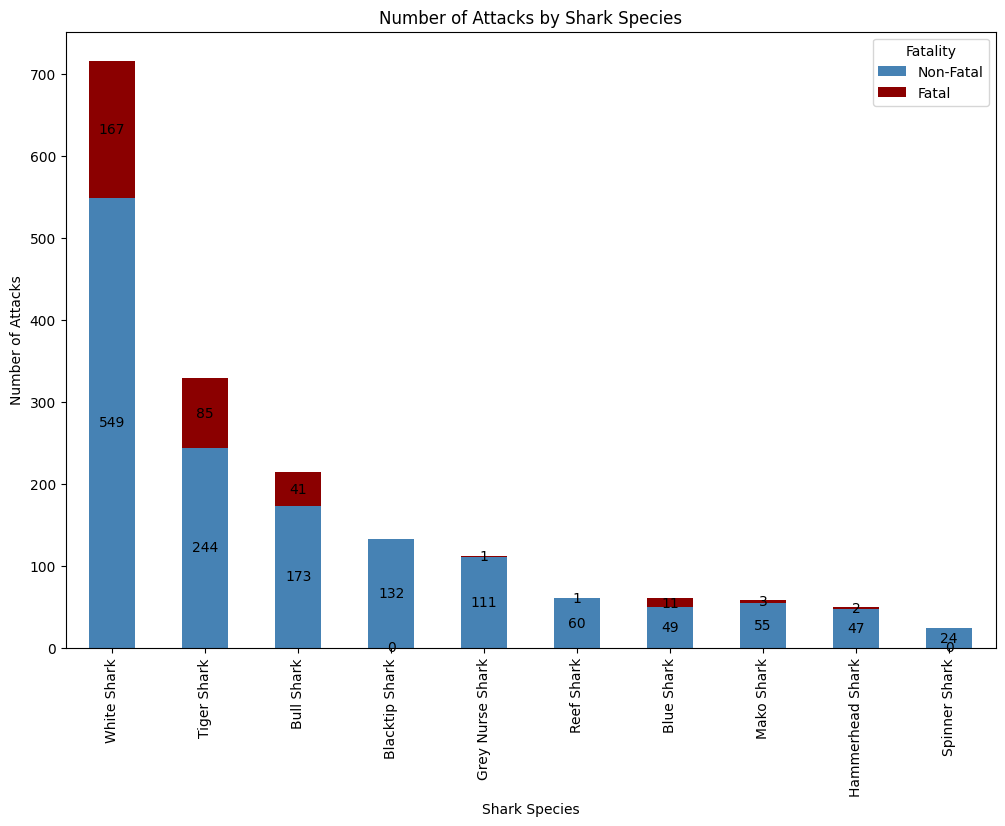

In [ ]:
grouped_data = sharks_h2.groupby(['Species', 'Fatal']).size().unstack(fill_value=0)

# Ensure 'True' and 'False' columns exist
if True not in grouped_data.columns:
    grouped_data[True] = 0
if False not in grouped_data.columns:
    grouped_data[False] = 0

# Calculate total attacks and sort by it
grouped_data['Total'] = grouped_data[True] + grouped_data[False]
grouped_data = grouped_data.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create stacked bar chart
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'darkred'])

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Add labels and title
ax.set_ylabel('Number of Attacks')
ax.set_xlabel('Shark Species')
ax.set_title('Number of Attacks by Shark Species')
ax.legend(["Non-Fatal", "Fatal"], title="Fatality")

# Display the plot
plt.show()

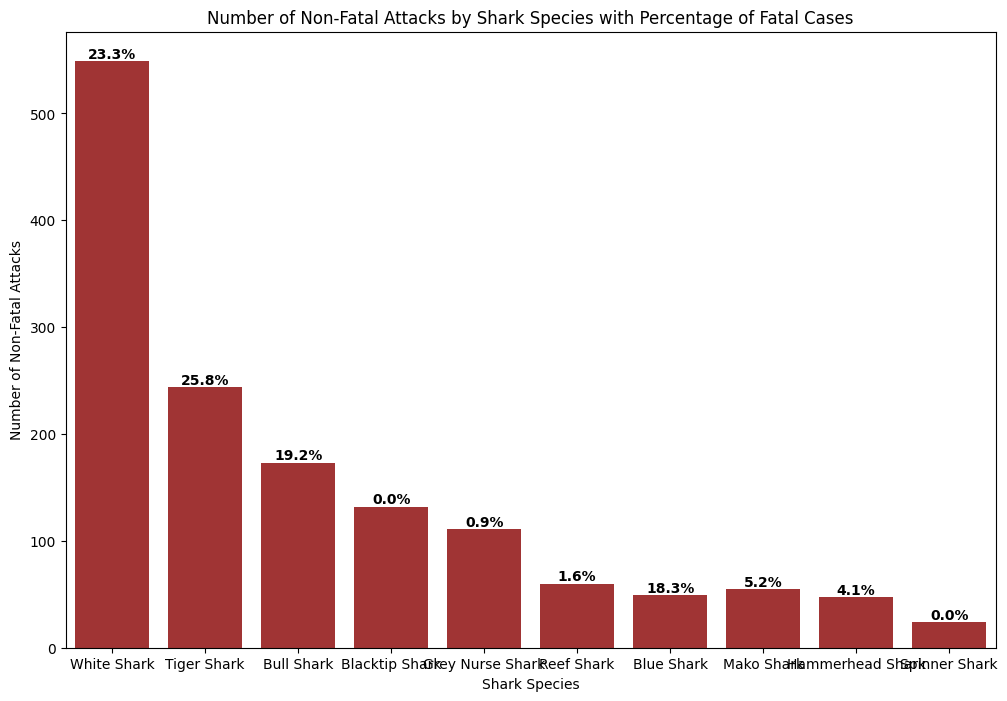

In [ ]:
grouped_data = sharks_h2.groupby(['Species', 'Fatal']).size().unstack(fill_value=0)

# Ensure 'True' and 'False' columns exist
if True not in grouped_data.columns:
    grouped_data[True] = 0
if False not in grouped_data.columns:
    grouped_data[False] = 0

# Calculate total attacks and sort by it
grouped_data['Total'] = grouped_data[True] + grouped_data[False]
grouped_data = grouped_data.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create stacked bar chart
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'darkred'])

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Add labels and title
ax.set_ylabel('Number of Attacks')
ax.set_xlabel('Shark Species')
ax.set_title('Number of Attacks by Shark Species')
ax.legend(["Non-Fatal", "Fatal"], title="Fatality")

# Display the plot
plt.show()

Hypotesis 3:

In [ ]:
sharks_h3 = sharks[["Year", "Activity", "Unnamed: 11"]]

sharks_h3.columns = ["Year", "Activity", "Fatal"]

In [ ]:
def extract_year_from_date(row):
    if pd.isna(row["Year"]) or row["Year"] == 0:
        match = re.search(r"(?<!\d)\d{4}(?!\d)", row["Date"])
        return match.group(0) if match else np.nan
    else:
        return row["Year"]

sharks_h3["Year"] = sharks_h3.apply(extract_year_from_date, axis=1)
sharks_h3[sharks_h3["Year"].isna()]
sharks_h3["Year"] = sharks_h3["Year"].fillna(0)
sharks_h3["Year"].dtype
# Changing data type from float to int
sharks_h3["Year"] = sharks_h3["Year"].astype('int')

In [ ]:
sharks_h3

Date  Year      Activity Unnamed: 11
0     15 Mar 2024  2024      Swimming         NaN
1     04 Mar 2024  2024       Surfing           N
2     02 Mar-2024  2024      Swimming           N
3     25 Feb-2024  2024           NaN           N
4     14 Feb-2024  2024       Fishing           N
...           ...   ...           ...         ...
6939  Before 1903  1903        Diving           Y
6940  Before 1903  1903  Pearl diving           Y
6941    1900-1905  1900      Swimming           Y
6942    1883-1889  1883           NaN           Y
6943    1845-1853  1845      Swimming           Y

[6944 rows x 4 columns]

In [ ]:
def extract_date_components(date_text):
    # Initialize default values
    day = "01"
    month = "Jan"
    year = "0000"

    # Define regex
    pattern = r'^(?:\S+\s+)?(\d{1,2})?[-\s]*([A-Za-z]{3,}.+?)?[-\s]*(\d{4}).*$'

    # Match the pattern in the date_text
    match = re.match(pattern, str(date_text))
    if match:
        # Extract components if matched
        day = match.group(1) if match.group(1) else "01"
        month = match.group(2)[:3] if match.group(2) else "Jan"
        year = match.group(3) if match.group(3) else "0000"

    return pd.Series([day, month, year], index=['day', 'month', 'year_1'])

sharks_h3[['day', 'month', 'year_1']] = sharks_h3['Date'].apply(extract_date_components)
# TODO: compare year with year_1, it should be the same, still, one should be dropped for clarity in the dataframe

print('DataFrame with added day, month, and year columns:')
print(sharks_h3)

DataFrame with added day, month, and year columns:
             Date  Year      Activity Unnamed: 11 day month year_1
0     15 Mar 2024  2024      Swimming         NaN  01   Mar   2024
1     04 Mar 2024  2024       Surfing           N  01   Mar   2024
2     02 Mar-2024  2024      Swimming           N  01   Mar   2024
3     25 Feb-2024  2024           NaN           N  01   Feb   2024
4     14 Feb-2024  2024       Fishing           N  01   Feb   2024
...           ...   ...           ...         ...  ..   ...    ...
6939  Before 1903  1903        Diving           Y  01   Jan   1903
6940  Before 1903  1903  Pearl diving           Y  01   Jan   1903
6941    1900-1905  1900      Swimming           Y  01   Jan   1900
6942    1883-1889  1883           NaN           Y  01   Jan   1883
6943    1845-1853  1845      Swimming           Y  01   Jan   1845

[6944 rows x 7 columns]


In [ ]:
cleanup_fatal = {
    'N': False, 'n': False, 'Nq': False, 'N ': False, ' N': False,
    'Y': True, 'M': True, 'F': True, 'Y x 2': True, 'y': True,
    'UNKNOWN': np.nan, 2017: np.nan
}

# Clean the column
sharks_h3['Fatal'] = sharks_h3['Fatal'].replace(cleanup_fatal)

<ipython-input-63-eff1ed1c295f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_h3['Fatal'] = sharks_h3['Fatal'].replace(cleanup_fatal)


In [ ]:
activity_mapping = {
    r'.*(surf|windsurf|kitesurf).*': 'Surfing',
    r'.*(paddle|stand-up paddle).*': 'Paddleboarding',
    r'.*spearfish.*': 'Spearfishing',
    r'.*(swim|wading|wade|bathing|swimming|swiming|float).*': 'Swimming',
    r'.*(dive|scuba|diving|pearl).*': 'Diving',
    r'.*snorkel.*': 'Snorkeling',
    r'.*fish.*': 'Fishing',
    r'.*kayak.*': 'Kayaking',
    r'.*canoe.*': 'Canoeing',
    r'.*(boating|sail).*': 'Boating',
    r'.*tread water.*': 'Treading Water',
}

# Function to clean activity names based on regex patterns
def clean_activity(activity):
    activity_lower = str(activity).lower()  # Convert to lowercase for case insensitivity

    # Check for regex patterns and map to standardized activity names
    for pattern, activity_sorting in activity_mapping.items():
        if re.search(pattern, activity_lower):
            return activity_sorting

    return np.nan  # Return np.nan for unmatched values


# Clean the 'Activity' column using the defined function
sharks_h3['Activity'] = sharks_h3['Activity'].apply(lambda x: clean_activity(x) if pd.notna(x) else np.nan)

print(sharks_h3)

        Year  Activity  Fatal
0     2024.0  Swimming    NaN
1     2024.0   Surfing  False
2     2024.0  Swimming  False
3     2024.0       NaN  False
4     2024.0   Fishing  False
...      ...       ...    ...
6939     0.0    Diving   True
6940     0.0    Diving   True
6941     0.0  Swimming   True
6942     0.0       NaN   True
6943     0.0  Swimming   True

[6944 rows x 3 columns]


<ipython-input-64-44e8dfbaac92>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_h3['Activity'] = sharks_h3['Activity'].apply(lambda x: clean_activity(x) if pd.notna(x) else np.nan)


In [ ]:
sharks_h3.dropna()

Year      Activity  Fatal
1     2024.0       Surfing  False
2     2024.0      Swimming  False
4     2024.0       Fishing  False
5     2024.0  Spearfishing  False
6     2024.0      Swimming  False
...      ...           ...    ...
6938     0.0      Swimming   True
6939     0.0        Diving   True
6940     0.0        Diving   True
6941     0.0      Swimming   True
6943     0.0      Swimming   True

[4825 rows x 3 columns]

In [ ]:
# Sorting by a single column in descending order (most recent year first)
sharks.sort_values(by="Year", ascending=False)

Date    Year        Type             Country  \
0              15 Mar 2024  2024.0  Unprovoked           AUSTRALIA   
2              02 Mar-2024  2024.0  Unprovoked                 USA   
3              25 Feb-2024  2024.0  Unprovoked           AUSTRALIA   
4              14 Feb-2024  2024.0  Unprovoked               INDIA   
5              04-Feb-2024  2024.0    Provoked            TRINIDAD   
...                    ...     ...         ...                 ...   
6850           Before 1901     0.0  Unprovoked           SRI LANKA   
6849           Before 1911     0.0  Unprovoked             VIETNAM   
6943             1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   
801   Reported 08-Jan-2017     NaN     Invalid           AUSTRALIA   
6713  Reported 19-Aug-1836     NaN  Unprovoked             ENGLAND   

                  State                             Location      Activity  \
0            Queensland                        Bargara Beach      Swimming   
2                Hawaii                       Rainbows, Oahu      Swimming   
3     Western Australia           Sandlnd Island, Jurian Bay           NaN   
4           Maharashtra     Vaitarna River, Palghar District       Fishing   
5                   NaN                                  NaN  Spearfishing   
...                 ...                                  ...           ...   
6850  Northern Province                               Mannar      Fishing?   
6849                NaN                                  NaN       Bathing   
6943   Eastern Province  Below the English fort, Trincomalee      Swimming   
801          Queensland                                  NaN  Spearfishing   
6713         Cumberland                           Whitehaven      Swimming   

                     Name Sex  Age  \
0          Brooklyn Sauer   F   13   
2                     NaN   F   11   
3                  female   F   46   
4     Vicky Suresh Govari   M   32   
5                    male   M  NaN   
...                   ...  ..  ...   
6850                 male   M  NaN   
6849                 male   M  NaN   
6943                 male   M   15   
801          Kerry Daniel   M   35   
6713                a boy   M  NaN   

                                                 Injury Unnamed: 11  \
0              Minor injuries to back, abdomen and legs         NaN   
2                              Lacerations to left foot           N   
3                                            Leg bitten           N   
4                        Calf of lower left leg injured           N   
5                                       Shoulder bitten           N   
...                                                 ...         ...   
6850                                        Foot bitten           N   
6849                                        Foot bitten           N   
6943  FATAL. "Shark bit him in half, carrying away t...           Y   
801              No attack, shark made a threat display         NaN   
6713                                              FATAL           Y   

                 Species                               Source  
0             Tiger shark               Yahoo News, 3/15/2024  
2          3' to 4' shark           Hawaii News Now, 3/4/2024  
3             Tiger shark                 WA Today, 2/26/2024  
4          Bull shark, 7'           Times of India, 2/14/2024  
5     Blacktip reef shark        Trinidad Guardian, 2/11/2014  
...                   ...                                 ...  
6850                  NaN                        Gould & Pyle  
6849                  NaN  Daily Kennebec Journal, 3/27/ 1911  
6943                  NaN                          S.W. Baker  
801            Bull shark              Liquid Vision 1/8/2017  
6713                  NaN                      C. Moore, GSAF  

[6944 rows x 14 columns]

In [ ]:
# Statistical Summary
data_summary = sharks.describe()
print("\nStatistical Summary:")
print(data_summary)


Statistical Summary:
              Year
count  6942.000000
mean   1934.403342
std     272.920956
min       0.000000
25%    1947.000000
50%    1985.000000
75%    2009.000000
max    2024.000000
